In [1]:
#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#supress warnings 
import warnings
warnings.filterwarnings('ignore')

## Data Loading

In [3]:
df=pd.read_csv('Airline_Delay_Cause.csv')

In [4]:
df.head()

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2023,12,9E,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",72.0,5.0,2.46,1.00,...,0.0,0.81,0.0,0.0,672.0,61.0,574.0,20.0,0.0,17.0
1,2023,12,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",62.0,7.0,4.25,0.00,...,0.0,1.75,0.0,0.0,348.0,252.0,0.0,33.0,0.0,63.0
2,2023,12,9E,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",95.0,10.0,5.94,0.00,...,0.0,3.00,0.0,0.0,859.0,536.0,0.0,47.0,0.0,276.0
3,2023,12,9E,Endeavor Air Inc.,ALB,"Albany, NY: Albany International",23.0,2.0,0.56,0.00,...,0.0,1.44,1.0,0.0,75.0,9.0,0.0,0.0,0.0,66.0
4,2023,12,9E,Endeavor Air Inc.,ATL,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",2111.0,256.0,76.88,8.75,...,0.0,117.94,1.0,0.0,21424.0,8906.0,732.0,1487.0,0.0,10299.0


In [5]:
df.columns

Index(['year', 'month', 'carrier', 'carrier_name', 'airport', 'airport_name',
       'arr_flights', 'arr_del15', 'carrier_ct', 'weather_ct', 'nas_ct',
       'security_ct', 'late_aircraft_ct', 'arr_cancelled', 'arr_diverted',
       'arr_delay', 'carrier_delay', 'weather_delay', 'nas_delay',
       'security_delay', 'late_aircraft_delay'],
      dtype='object')

In [6]:
df.shape

(179338, 21)

In [7]:
df.dtypes

year                     int64
month                    int64
carrier                 object
carrier_name            object
airport                 object
airport_name            object
arr_flights            float64
arr_del15              float64
carrier_ct             float64
weather_ct             float64
nas_ct                 float64
security_ct            float64
late_aircraft_ct       float64
arr_cancelled          float64
arr_diverted           float64
arr_delay              float64
carrier_delay          float64
weather_delay          float64
nas_delay              float64
security_delay         float64
late_aircraft_delay    float64
dtype: object

In [8]:
df.describe()

,year,month,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
count,179338.000000,179338.000000,178997.000000,178747.000000,178997.000000,178997.000000,178997.000000,178997.000000,178997.000000,178997.000000,178997.000000,178997.000000,178997.000000,178997.000000,178997.000000,178997.000000,178997.000000
mean,2019.480082,6.485725,327.816969,58.709086,18.572643,2.035742,17.094929,0.145307,20.778477,6.830103,0.779572,3863.310676,1325.546199,209.113426,819.949284,6.839941,1501.854875
std,2.410204,3.463516,931.001446,164.378035,47.389651,6.894812,56.279604,0.702149,64.912766,41.446756,3.490499,11902.153241,4067.786987,791.817638,3178.603458,40.440497,4878.178427
min,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2018.000000,3.000000,41.000000,6.000000,1.960000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,288.000000,91.000000,0.000000,28.000000,0.000000,54.000000
50%,2020.000000,6.000000,89.000000,15.000000,5.400000,0.220000,3.300000,0.000000,4.290000,1.000000,0.000000,900.000000,321.000000,12.000000,124.000000,0.000000,286.000000
75%,2022.000000,9.000000,218.000000,40.000000,14.700000,1.620000,9.860000,0.000000,13.010000,3.000000,1.000000,2547.000000,986.000000,131.000000,401.000000,0.000000,964.000000
max,2023.000000,12.000000,21977.000000,4176.000000,1293.910000,266.420000,1884.420000,58.690000,2069.070000,4951.000000,160.000000,438783.000000,196944.000000,31960.000000,112018.000000,3760.000000,227959.000000


## Data Cleaning and Preparation

In [9]:
#check for null values in each column
df.isnull().sum()

year                     0
month                    0
carrier                  0
carrier_name             0
airport                  0
airport_name             0
arr_flights            341
arr_del15              591
carrier_ct             341
weather_ct             341
nas_ct                 341
security_ct            341
late_aircraft_ct       341
arr_cancelled          341
arr_diverted           341
arr_delay              341
carrier_delay          341
weather_delay          341
nas_delay              341
security_delay         341
late_aircraft_delay    341
dtype: int64

In [10]:
#percentage of null values in each column
df.isnull().mean()*100

year                   0.000000
month                  0.000000
carrier                0.000000
carrier_name           0.000000
airport                0.000000
airport_name           0.000000
arr_flights            0.190144
arr_del15              0.329545
carrier_ct             0.190144
weather_ct             0.190144
nas_ct                 0.190144
security_ct            0.190144
late_aircraft_ct       0.190144
arr_cancelled          0.190144
arr_diverted           0.190144
arr_delay              0.190144
carrier_delay          0.190144
weather_delay          0.190144
nas_delay              0.190144
security_delay         0.190144
late_aircraft_delay    0.190144
dtype: float64

In [11]:
#impute null values 

In [12]:
from sklearn.impute import SimpleImputer

In [13]:
new_df = df.copy()

In [14]:
num_cols = new_df.select_dtypes(include=['int64', 'float64']).columns

In [15]:
num_imputer = SimpleImputer(strategy='mean')
new_df[num_cols] = num_imputer.fit_transform(new_df[num_cols])

In [16]:
#compare the shape of new df with old
df.shape,new_df.shape

((179338, 21), (179338, 21))

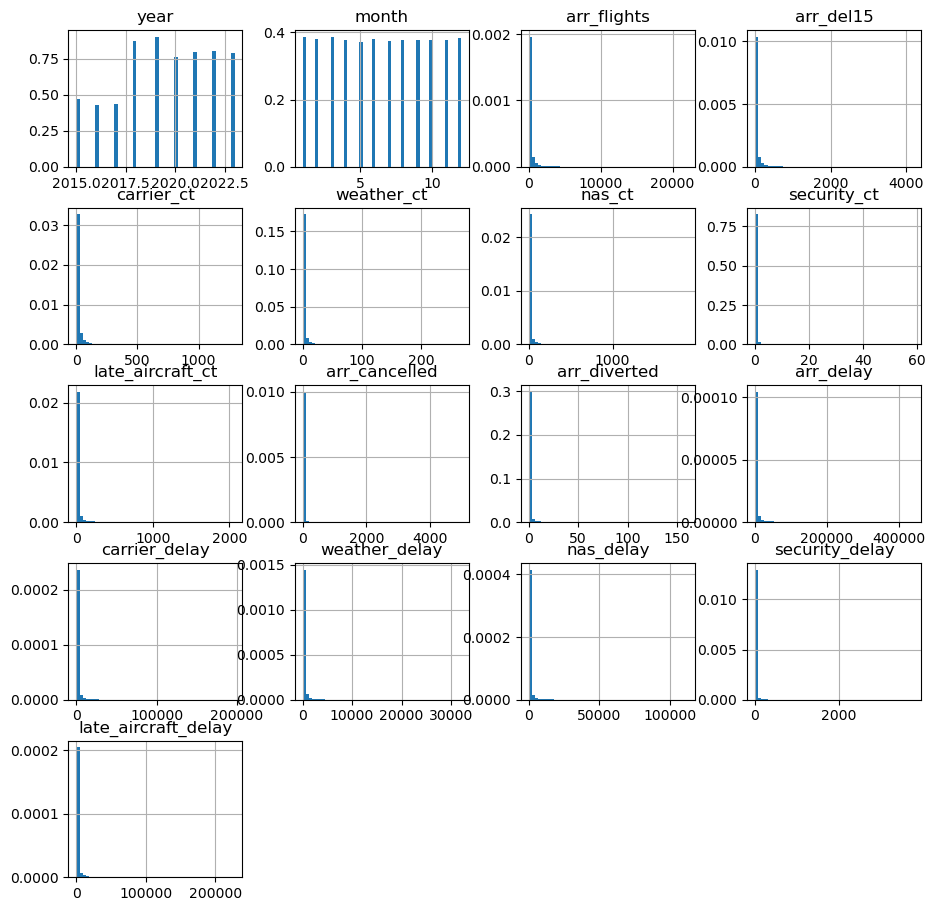

In [17]:
#historgram display of each column
new_df.hist(bins=50,density=True,figsize=(11,11))
plt.show()

## Check similarities and compare new_df with initial df by overallaping density curves

<Axes: ylabel='Density'>

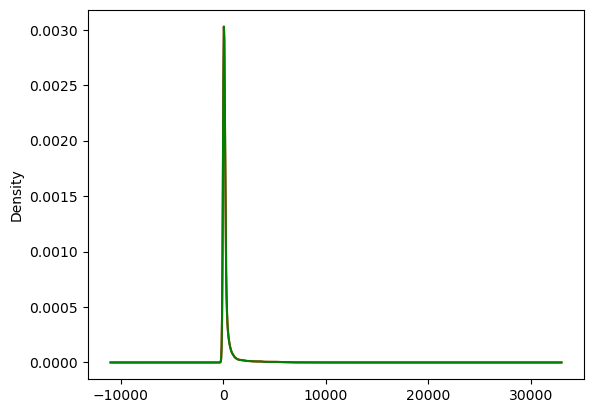

In [18]:
fig=plt.figure()
ax=fig.add_subplot(111)
#original
df['arr_flights'].plot.density(color='red')

#data after cca
new_df['arr_flights'].plot.density(color='green')

#the density curve is almost overlapping

<Axes: ylabel='Density'>

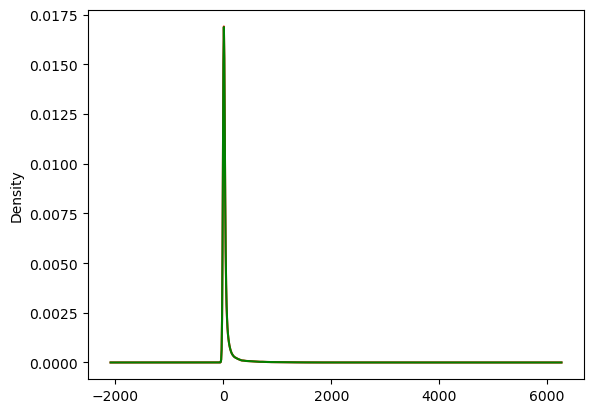

In [19]:
fig=plt.figure()
ax=fig.add_subplot(111)
#original
df['arr_del15'].plot.density(color='red')

#data after cca
new_df['arr_del15'].plot.density(color='green')

#the density curve is almost overlapping

In [20]:
#check if all null values are removed and dataset has 0 Nan values now
new_df.isnull().sum()

year                   0
month                  0
carrier                0
carrier_name           0
airport                0
airport_name           0
arr_flights            0
arr_del15              0
carrier_ct             0
weather_ct             0
nas_ct                 0
security_ct            0
late_aircraft_ct       0
arr_cancelled          0
arr_diverted           0
arr_delay              0
carrier_delay          0
weather_delay          0
nas_delay              0
security_delay         0
late_aircraft_delay    0
dtype: int64

In [21]:
new_df.head()

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2023.0,12.0,9E,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",72.0,5.0,2.46,1.00,...,0.0,0.81,0.0,0.0,672.0,61.0,574.0,20.0,0.0,17.0
1,2023.0,12.0,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",62.0,7.0,4.25,0.00,...,0.0,1.75,0.0,0.0,348.0,252.0,0.0,33.0,0.0,63.0
2,2023.0,12.0,9E,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",95.0,10.0,5.94,0.00,...,0.0,3.00,0.0,0.0,859.0,536.0,0.0,47.0,0.0,276.0
3,2023.0,12.0,9E,Endeavor Air Inc.,ALB,"Albany, NY: Albany International",23.0,2.0,0.56,0.00,...,0.0,1.44,1.0,0.0,75.0,9.0,0.0,0.0,0.0,66.0
4,2023.0,12.0,9E,Endeavor Air Inc.,ATL,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",2111.0,256.0,76.88,8.75,...,0.0,117.94,1.0,0.0,21424.0,8906.0,732.0,1487.0,0.0,10299.0


## Arrival Delay Distribution

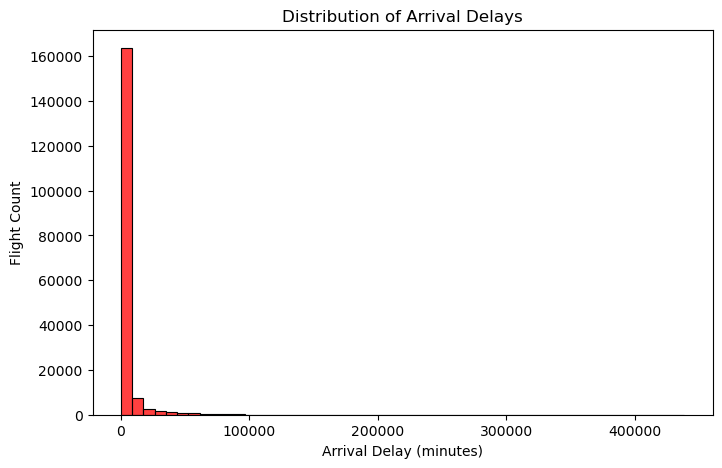

In [22]:
plt.figure(figsize=(8,5))

sns.histplot(new_df['arr_delay'], bins=50, color='red')
plt.title("Distribution of Arrival Delays") 
plt.xlabel("Arrival Delay (minutes)")  
plt.ylabel("Flight Count")
plt.savefig('arrdelay.png', dpi=300)

plt.show()

Most of the flights arrive on time or very minor delay. Some small portion of flights experience major delays that form the tail in historgram.

## Proportion of Delayed Flights

In [23]:
delayed_ratio = new_df['arr_del15'].sum() / new_df['arr_flights'].sum()
print(f"Overall Flight Delay Rate: {delayed_ratio:.2%}")

Overall Flight Delay Rate: 17.91%


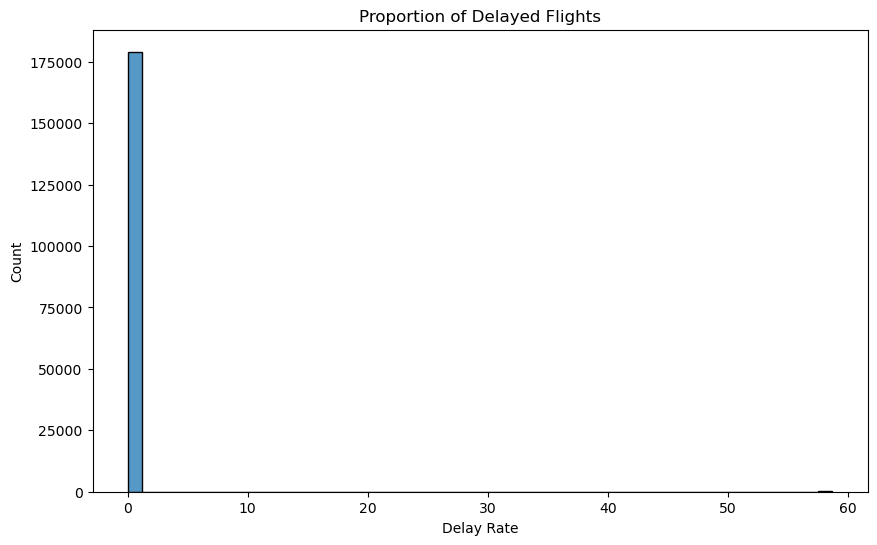

In [24]:
new_df['delay_rate'] = new_df['arr_del15'] /new_df['arr_flights']

plt.figure(figsize=(10, 6))

sns.histplot(new_df['delay_rate'], bins=50)
plt.title("Proportion of Delayed Flights")
plt.xlabel("Delay Rate")
plt.ylabel("Count")

plt.show()

## Common Delay Causes

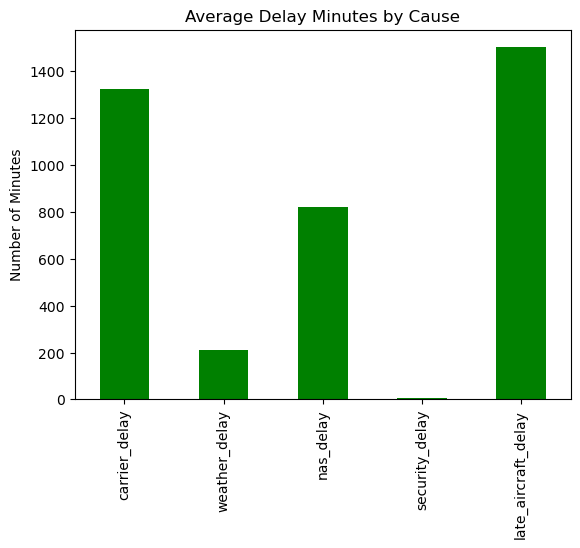

In [25]:
delay_causes = ['carrier_delay', 'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay']
new_df[delay_causes].mean().plot(kind='bar', color='green')

plt.title("Average Delay Minutes by Cause")
plt.ylabel("Number of Minutes")
plt.savefig('delay_cause.png', dpi=300,bbox_inches='tight')

plt.show()

Delays due to carrier and late aircraft dominate while very less delays due to weather and security 

## Delays by Month (Seasonal Trends)

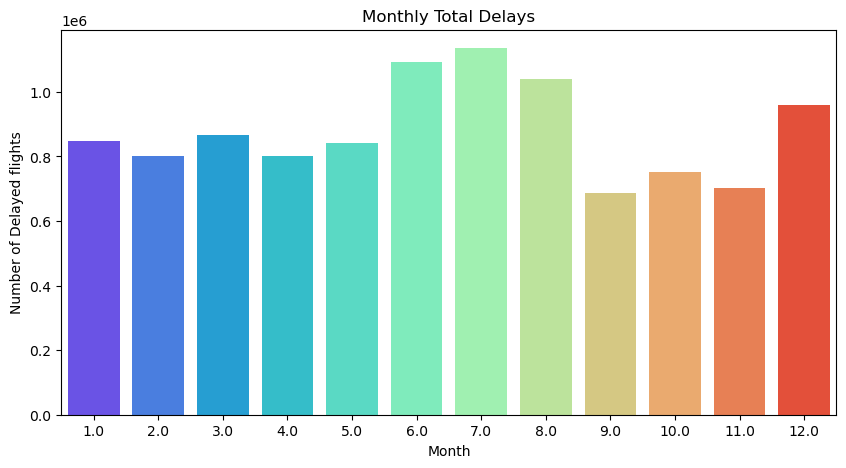

In [26]:
monthly_delay = new_df.groupby('month')['arr_del15'].sum().reset_index()

plt.figure(figsize=(10, 5))

sns.barplot(data=monthly_delay, x='month', y='arr_del15', palette='rainbow')
plt.title("Monthly Total Delays")
plt.xlabel("Month")
plt.ylabel("Number of Delayed flights")
plt.savefig('delay_month.png', dpi=300,bbox_inches='tight')

plt.show()

More delays obeserved in the months of July,August and June

## Delays by Carrier

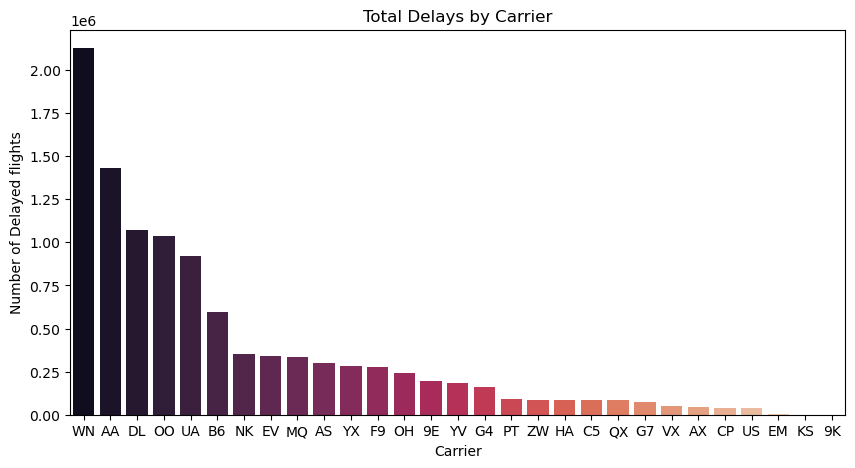

In [27]:
carrier_delay = new_df.groupby('carrier')['arr_del15'].sum().sort_values(ascending=False).reset_index()

plt.figure(figsize=(10, 5))
sns.barplot(data=carrier_delay, x='carrier', y='arr_del15', palette='rocket')
plt.title("Total Delays by Carrier")
plt.xlabel("Carrier")
plt.ylabel("Number of Delayed flights")

plt.show()

## Delays by Airport

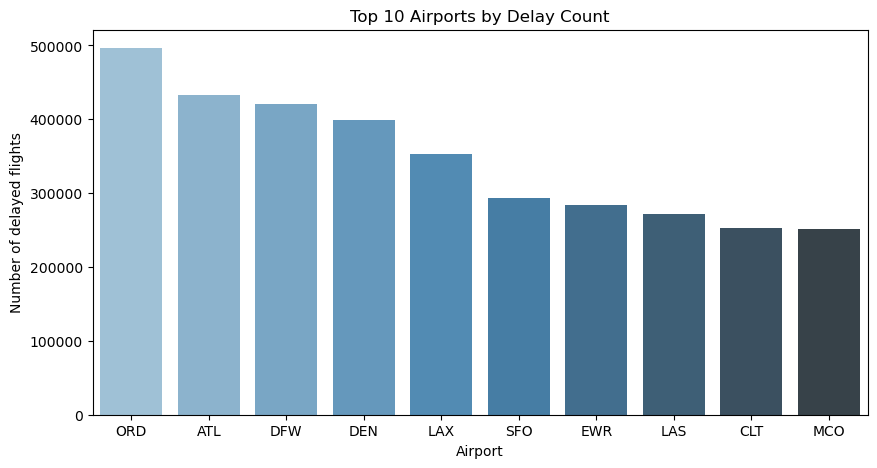

In [28]:
airport_delay = new_df.groupby('airport')['arr_del15'].sum().sort_values(ascending=False).head(10).reset_index()

plt.figure(figsize=(10, 5))
sns.barplot(data=airport_delay, x='airport', y='arr_del15', palette='Blues_d')
plt.title("Top 10 Airports by Delay Count")
plt.xlabel("Airport")
plt.ylabel("Number of delayed flights")

plt.show()

## Boxplot of Delay Causes

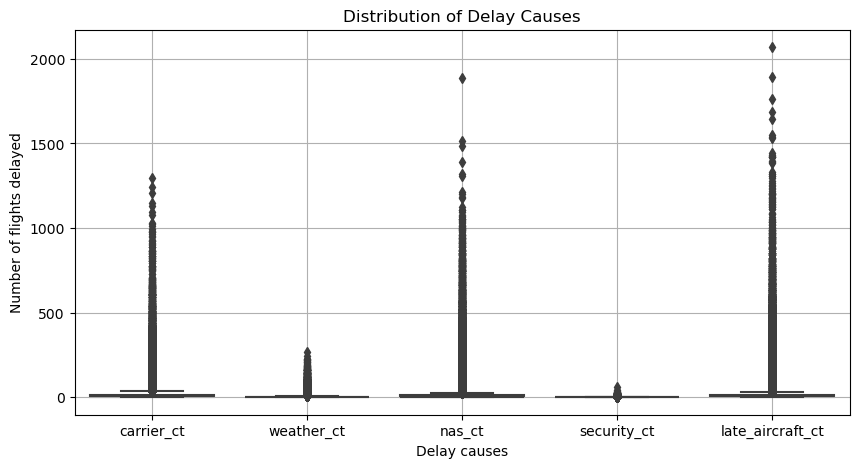

In [29]:
delay_causes = ['carrier_ct', 'weather_ct', 'nas_ct', 'security_ct', 'late_aircraft_ct']

plt.figure(figsize=(10, 5))
sns.boxplot(data=new_df[delay_causes])
plt.title("Distribution of Delay Causes")
plt.xlabel("Delay causes")
plt.ylabel("Number of flights delayed")
plt.grid(True)

plt.show()

## Delay Breakdown by Cause 

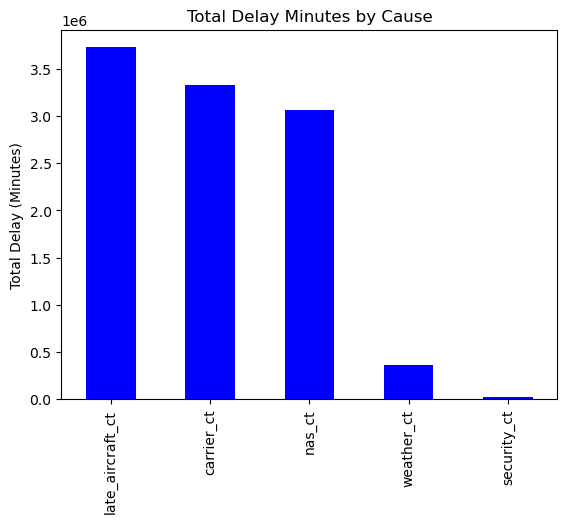

In [30]:
cause_totals = new_df[delay_causes].sum().sort_values(ascending=False)
cause_totals.plot(kind='bar', title='Total Delay Minutes by Cause', color='blue')
plt.ylabel("Total Delay (Minutes)")

plt.show()

## Correlation Heatmap

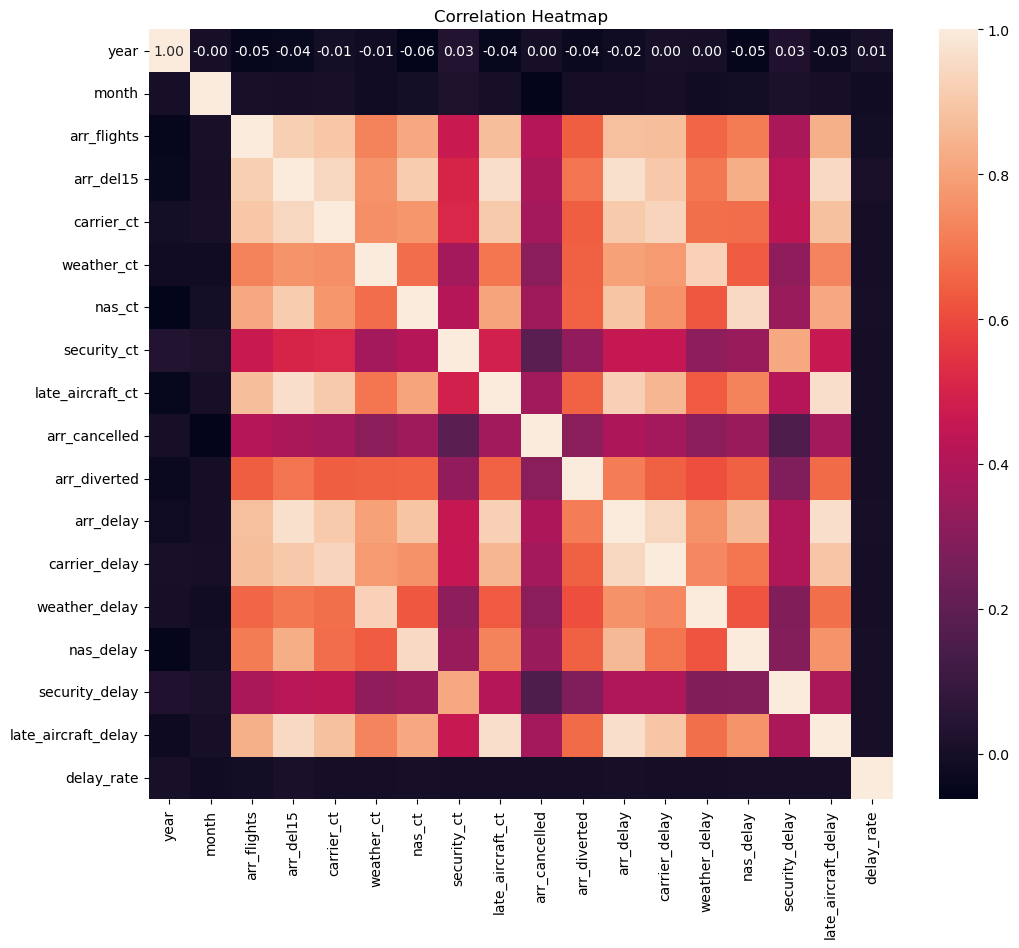

In [31]:
plt.figure(figsize=(12, 10))
sns.heatmap(new_df.corr(numeric_only=True), annot=True,fmt=".2f")
plt.title("Correlation Heatmap")
plt.savefig('correlation_map.png', dpi=300,bbox_inches='tight')

plt.show()

In [32]:
new_df.head()

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,delay_rate
0,2023.0,12.0,9E,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",72.0,5.0,2.46,1.00,...,0.81,0.0,0.0,672.0,61.0,574.0,20.0,0.0,17.0,0.069444
1,2023.0,12.0,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",62.0,7.0,4.25,0.00,...,1.75,0.0,0.0,348.0,252.0,0.0,33.0,0.0,63.0,0.112903
2,2023.0,12.0,9E,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",95.0,10.0,5.94,0.00,...,3.00,0.0,0.0,859.0,536.0,0.0,47.0,0.0,276.0,0.105263
3,2023.0,12.0,9E,Endeavor Air Inc.,ALB,"Albany, NY: Albany International",23.0,2.0,0.56,0.00,...,1.44,1.0,0.0,75.0,9.0,0.0,0.0,0.0,66.0,0.086957
4,2023.0,12.0,9E,Endeavor Air Inc.,ATL,"Atlanta, GA: Hartsfield-Jackson Atlanta Intern...",2111.0,256.0,76.88,8.75,...,117.94,1.0,0.0,21424.0,8906.0,732.0,1487.0,0.0,10299.0,0.121270


# Prediction Model

In [33]:
#classification target
new_df['delay_likely'] = (new_df['arr_del15'] / new_df['arr_flights']) > 0.1
new_df['delay_likely'] = new_df['delay_likely'].map({True: 'Yes', False: 'No'})

#regression target
new_df['expected_delay_duration'] = new_df['arr_delay']

In [41]:
#operational adjustability index (OAI)
new_df['OAI'] = (new_df['carrier_delay'] + new_df['late_aircraft_delay']) / (new_df['arr_delay'] + 1e-5)

In [42]:
#normalize delay counts
for col in ['carrier_ct', 'weather_ct', 'nas_ct', 'security_ct', 'late_aircraft_ct']:
    new_df[col + '_pct'] = new_df[col] / (new_df['arr_flights'] + 1e-5)

In [47]:
from sklearn.preprocessing import LabelEncoder

In [48]:
label_enc = LabelEncoder()

In [49]:
for col in ['carrier', 'airport', 'month']:
    new_df[col] = label_enc.fit_transform(new_df[col])

In [50]:
#drop unncessary columns
drop_cols = ['carrier_name', 'airport_name', 'arr_flights', 'arr_del15',
             'arr_cancelled', 'arr_diverted', 'arr_delay']

In [51]:
X = new_df.drop(columns=drop_cols + ['delay_likely', 'expected_delay_duration'])

# Classification
y_class = new_df['delay_likely'] 

# Regression
y_reg = new_df['expected_delay_duration']            

In [52]:
from sklearn.model_selection import train_test_split

In [53]:
#classification
X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(X, y_class, test_size=0.2, random_state=42)

#regression
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X, y_reg, test_size=0.2, random_state=42)

## Classification Model

In [54]:
from sklearn.ensemble import RandomForestClassifier

X_train_cls = X_train_cls.fillna(0)
X_test_cls = X_test_cls.fillna(0)

In [55]:
#train classification model
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train_cls, y_train_cls)

RandomForestClassifier(random_state=42)

## Regression Model

In [56]:
from sklearn.ensemble import RandomForestRegressor

X_train_reg = X_train_reg.fillna(0)
X_test_reg = X_test_reg.fillna(0)

# Use OAI as sample weights
weights = new_df.loc[X_train_reg.index, 'OAI']

In [57]:
#train regression model
reg = RandomForestRegressor(n_estimators=100, random_state=42)
reg.fit(X_train_reg, y_train_reg, sample_weight=weights)

RandomForestRegressor(random_state=42)

# Model Evaluation

## Classification model

In [58]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve,f1_score

In [59]:
y_pred_cls = clf.predict(X_test_cls)

#probability of class
y_proba_cls = clf.predict_proba(X_test_cls)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test_cls.map({'No': 0, 'Yes': 1}), y_proba_cls)

In [60]:
print("Classification Report:")
print(classification_report(y_test_cls, y_pred_cls))

print("Confusion Matrix:\n", confusion_matrix(y_test_cls, y_pred_cls))
print("AUC Score:", roc_auc_score(y_test_cls.map({'No': 0, 'Yes': 1}), y_proba_cls))
print("F1 Score:",f1_score(y_test_cls, y_pred_cls,pos_label='Yes'))

Classification Report:
              precision    recall  f1-score   support

          No       1.00      1.00      1.00      8526
         Yes       1.00      1.00      1.00     27342

    accuracy                           1.00     35868
   macro avg       1.00      1.00      1.00     35868
weighted avg       1.00      1.00      1.00     35868

Confusion Matrix:
 [[ 8526     0]
 [    0 27342]]
AUC Score: 1.0
F1 Score: 1.0


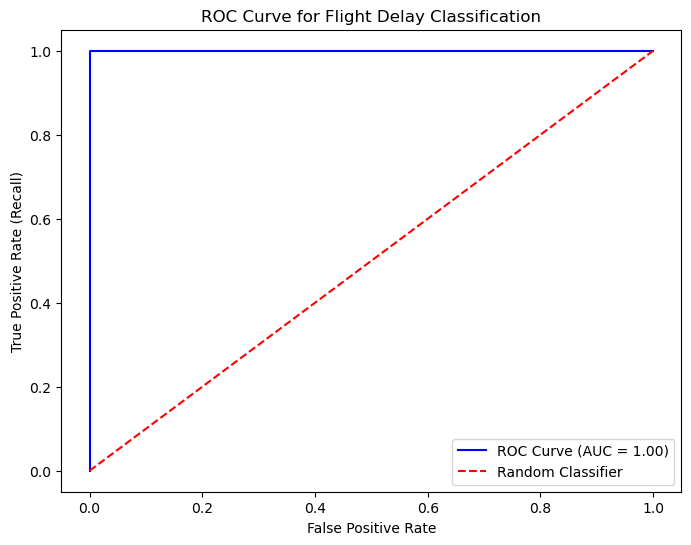

In [61]:
# Convert y_test_cls to binary for ROC curve
y_true_binary = y_test_cls.map({'No': 0, 'Yes': 1})

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_true_binary, y_proba_cls)
auc_score = roc_auc_score(y_true_binary, y_proba_cls)

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve for Flight Delay Classification')
plt.legend(loc='lower right')
plt.savefig('roc_curve.png', dpi=300,bbox_inches='tight')

plt.show()

## Regression

## Random Forest Regressor Model

In [62]:
from sklearn.ensemble import RandomForestRegressor

In [63]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

#train model
rf_model.fit(X_train_reg, y_train_reg)

#predict
y_pred_rf = rf_model.predict(X_test_reg)

In [64]:
from xgboost import XGBRegressor

In [65]:
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)

#train model
xgb_model.fit(X_train_reg, y_train_reg)

#predict
y_pred_xgb = xgb_model.predict(X_test_reg)

In [66]:
from lightgbm import LGBMRegressor

In [67]:
lgb_model = LGBMRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

#train model
lgb_model.fit(X_train_reg, y_train_reg)

#predict
y_pred_lgb = lgb_model.predict(X_test_reg)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.033289 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4632
[LightGBM] [Info] Number of data points in the train set: 143470, number of used features: 21
[LightGBM] [Info] Start training from score 3880.443119


In [68]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [69]:
model_performance = {
    'Random Forest': {
        'MAE': mean_absolute_error(y_test_reg, y_pred_rf),
        'RMSE': np.sqrt(mean_squared_error(y_test_reg, y_pred_rf))
    },
    'XGBoost': {
        'MAE': mean_absolute_error(y_test_reg, y_pred_xgb),
        'RMSE': np.sqrt(mean_squared_error(y_test_reg, y_pred_xgb))
    },
    'LightGBM': {
        'MAE': mean_absolute_error(y_test_reg, y_pred_lgb),
        'RMSE': np.sqrt(mean_squared_error(y_test_reg, y_pred_lgb))
    }
}

In [70]:
# Evaluate
print("Model Performance Comparison:\n")

print("Random Forest:")
print("MAE:", mean_absolute_error(y_test_reg, y_pred_rf))
print("RMSE:", np.sqrt(mean_squared_error(y_test_reg, y_pred_rf)))
print()

print("XGBoost:")
print("MAE:", mean_absolute_error(y_test_reg, y_pred_xgb))
print("RMSE:", np.sqrt(mean_squared_error(y_test_reg, y_pred_xgb)))
print()

print("LightGBM:")
print("MAE:", mean_absolute_error(y_test_reg, y_pred_lgb))
print("RMSE:", np.sqrt(mean_squared_error(y_test_reg, y_pred_lgb)))

Model Performance Comparison:

Random Forest:
MAE: 83.468161061995
RMSE: 762.3423796528053

XGBoost:
MAE: 183.59346374799165
RMSE: 1202.4691769059698

LightGBM:
MAE: 172.1179504755255
RMSE: 1066.5444229761704


In [71]:
# Display performance comparison
import pandas as pd

performance_df = pd.DataFrame(model_performance).T
performance_df = performance_df.sort_values(by='RMSE')
print(performance_df)

                      MAE         RMSE
Random Forest   83.468161   762.342380
LightGBM       172.117950  1066.544423
XGBoost        183.593464  1202.469177


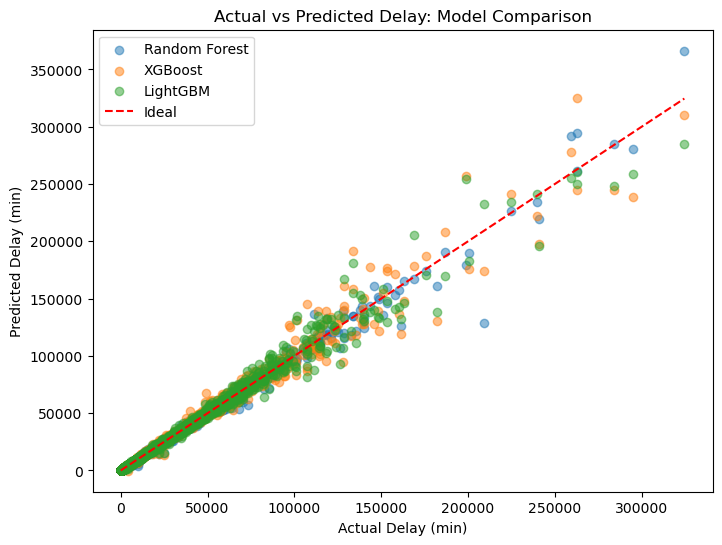

In [72]:
plt.figure(figsize=(8, 6))

plt.scatter(y_test_reg, y_pred_rf, alpha=0.5, label='Random Forest')
plt.scatter(y_test_reg, y_pred_xgb, alpha=0.5, label='XGBoost')
plt.scatter(y_test_reg, y_pred_lgb, alpha=0.5, label='LightGBM')

plt.plot([0, max(y_test_reg)], [0, max(y_test_reg)], 'r--', label='Ideal')
plt.xlabel('Actual Delay (min)')
plt.ylabel('Predicted Delay (min)')
plt.title('Actual vs Predicted Delay: Model Comparison')
plt.legend()
plt.savefig('model_comparison.png', dpi=300,bbox_inches='tight')

plt.show()

# Explainable ML using SHAP:

In [73]:
import shap

## For classifier:

In [74]:
#we used specific tree explainer because our model is RandomForest based
explainer_cls = shap.TreeExplainer(clf)
shap_values_cls = explainer_cls.shap_values(X_test_cls)

In [ ]:
#summary plot
plt.figure(figsize=(10, 5))
shap.summary_plot(shap_values_cls, X_test_cls, plot_type="bar")
plt.savefig('shap_cls.png', dpi=300,bbox_inches='tight')

## For regressor

In [ ]:
explainer_reg = shap.TreeExplainer(reg)
shap_values_reg = explainer_reg.shap_values(X_test_reg)

In [ ]:
#summary plot
shap.summary_plot(shap_values_reg, X_test_reg, plot_type="bar", show=True)

In [ ]:
#top features by absolute SHAP value for regression
shap_importance = pd.DataFrame(shap_values_reg, columns=X_test_reg.columns).abs().mean().sort_values(ascending=False)